In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [2]:
df = pd.read_csv('Rating organization comparison - Validi.csv')
df


,Nome,Pagina web,Paywall,Url dataset,Tipologia,Scaladi output di reputabilità,Criteri automatizzabili,Metodologia di stima della reputabilità,Criteri STRUTTURATI per la stima della reputabilità,Provenienza dati,Altre informazioni,Risorse utili
0,Newsguard,https://www.newsguardtech.com/,Sì,NaN,Società,100.0,Regularly corrects or clarifies errors\n\nWebs...,Annotatori e parametri struttrati,Does not repeatedly publish false content\nGat...,Propri,Articolo Marinella e Manuel,NaN
1,Ground News,https://ground.news/,Sì,NaN,Società,100.0,"Si, perché lo fa un algoritmo",Algoritmo,Calcolata con un algoritmo dai dati provenient...,Derivati,NaN,NaN
2,Ad Fontes Media (AFM),https://adfontesmedia.com/,Sì,NaN,Società,100.0,No,Annotatori e parametri struttrati,La metodologia di stima della reputabilità del...,Propri,NaN,NaN
3,Media Bias/Fact Check,https://mediabiasfactcheck.com/,No,https://mediabiasfactcheck.com/,Società,100.0,Traffic/Longevity:\n High Traffic: 2 points\...,Annotatori e parametri struttrati,Factual Reporting:\nVery High: 4 points\nHigh:...,Propri,NaN,NaN
4,GDI,https://www.disinformationindex.org/,Sì,NaN,Società,100.0,Attribution\nComment policies \nFunding\nOwner...,Annotatori e parametri struttrati,Headline accuracy\nLede present\nByline inform...,Propri,Articolo Marinella e Manuel,NaN
5,Creddler,http://creddle.io/,No,https://credder.com/,Società,100.0,No,Annotatori professionali e utenti non speciali...,"Credible --> Investigative, Balanced, Well Sou...",Propri,NaN,NaN
6,Grinberg et al,https://www.science.org/doi/10.1126/science.aa...,No,https://github.com/LazerLab/twitter-fake-news-...,Articolo scientifico,3.0,No,Ricercatori,Per stimare la reputabilità delle fonti di inf...,Derivati,"Link all'articolo, Rapporto",NaN
7,BuzzFeed News,https://www.buzzfeednews.com/article/craigsilv...,No,https://github.com/BuzzFeedNews/2017-08-partis...,Articolo di giornale,4.0,No,Giornalisti,Mostly True: The post and any related link or ...,Propri,Fonte,NaN
8,iffy.news,iffy.news,No,https://iffy.news/index/,Sito web / Blog,NaN,No,Algoritmo,Classifica la credibilità sulla base delle val...,Derivati,"""The links in the MBFC Factual column go to th...",NaN
9,MisinfoMe,https://misinfo.me/frontend-v2/home,No,https://misinfo.me/frontend-v2/home,Sito web / Blog,200.0,No,Algoritmo,"MisinfoMe assegna un punteggio di credibilità,...",Derivati,Articolo sceintifico in cui si descrive come f...,NaN


In [3]:
df = df.drop(columns=['Pagina web', 'Url dataset','Altre informazioni','Risorse utili'])

df.loc[df['Criteri automatizzabili'] != 'No', 'Criteri automatizzabili',] = 'Sì'
df.loc[df['Criteri STRUTTURATI per la stima della reputabilità'] != 'No', 'Criteri STRUTTURATI per la stima della reputabilità',] = 'Sì'

df

,Nome,Paywall,Tipologia,Scaladi output di reputabilità,Criteri automatizzabili,Metodologia di stima della reputabilità,Criteri STRUTTURATI per la stima della reputabilità,Provenienza dati
0,Newsguard,Sì,Società,100.0,Sì,Annotatori e parametri struttrati,Sì,Propri
1,Ground News,Sì,Società,100.0,Sì,Algoritmo,Sì,Derivati
2,Ad Fontes Media (AFM),Sì,Società,100.0,No,Annotatori e parametri struttrati,Sì,Propri
3,Media Bias/Fact Check,No,Società,100.0,Sì,Annotatori e parametri struttrati,Sì,Propri
4,GDI,Sì,Società,100.0,Sì,Annotatori e parametri struttrati,Sì,Propri
5,Creddler,No,Società,100.0,No,Annotatori professionali e utenti non speciali...,Sì,Propri
6,Grinberg et al,No,Articolo scientifico,3.0,No,Ricercatori,Sì,Derivati
7,BuzzFeed News,No,Articolo di giornale,4.0,No,Giornalisti,Sì,Propri
8,iffy.news,No,Sito web / Blog,NaN,No,Algoritmo,Sì,Derivati
9,MisinfoMe,No,Sito web / Blog,200.0,No,Algoritmo,Sì,Derivati


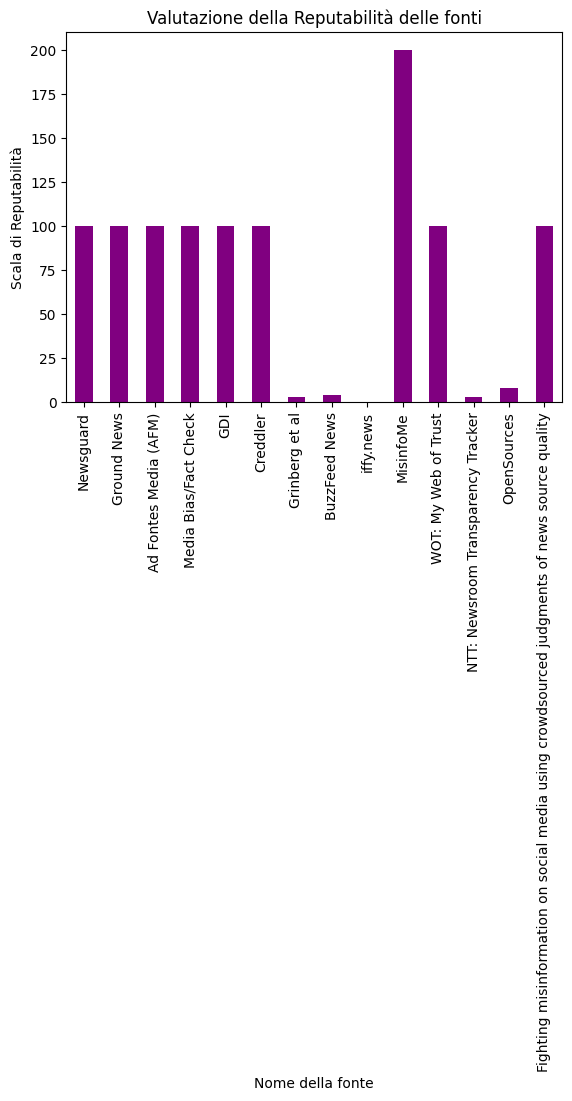

In [4]:
# 3. Valutazione della Reputabilità delle fonti
reputazione_plot = df.plot(x='Nome', y='Scaladi output di reputabilità', kind='bar', legend=False, color='purple')
plt.title('Valutazione della Reputabilità delle fonti')
plt.xlabel('Nome della fonte')
plt.ylabel('Scala di Reputabilità')
plt.show()Nome	Paywall	Tipologia	Scaladi output di reputabilità	Criteri automatizzabili	Metodologia di stima della reputabilità	Criteri STRUTTURATI per la stima della reputabilità	Provenienza dati
0	Newsguard	Sì	Società	100.0	Sì	Annotatori e parametri struttrati	Sì	Propri
1	Ground News	Sì	Società	100.0	Sì	Algoritmo	Sì	Derivati
2	Ad Fontes Media (AFM)	Sì	Società	100.0	No	Annotatori e parametri struttrati	Sì	Propri
3	Media Bias/Fact Check	No	Società	100.0	Sì	Annotatori e parametri struttrati	Sì	Propri
4	GDI	Sì	Società	100.0	Sì	Annotatori e parametri struttrati	Sì	Propri
5	Creddler	No	Società	100.0	No	Annotatori professionali e utenti non speciali...	Sì	Propri
6	Grinberg et al	No	Articolo scientifico	3.0	No	Ricercatori	Sì	Derivati
7	BuzzFeed News	No	Articolo di giornale	4.0	No	Giornalisti	Sì	Propri
8	iffy.news	No	Sito web / Blog	NaN	No	Algoritmo	Sì	Derivati
9	MisinfoMe	No	Sito web / Blog	200.0	No	Algoritmo	Sì	Derivati
10	WOT: My Web of Trust	No	Società	100.0	No	Algorimo e utenti non specializzati	Sì	Propri
11	NTT: Newsroom Transparency Tracker	No	Organizzazione senza scopo di lucro	3.0	Sì	Giornalisti	Sì	Propri
12	OpenSources	No	Sito web / Blog	8.0	Sì	Ricercatori	Sì	Propri
13	Fighting misinformation on social media using ...	No	Articolo scientifico	100.0	No	Giornalisti e utenti non specializzati	Sì	Propri



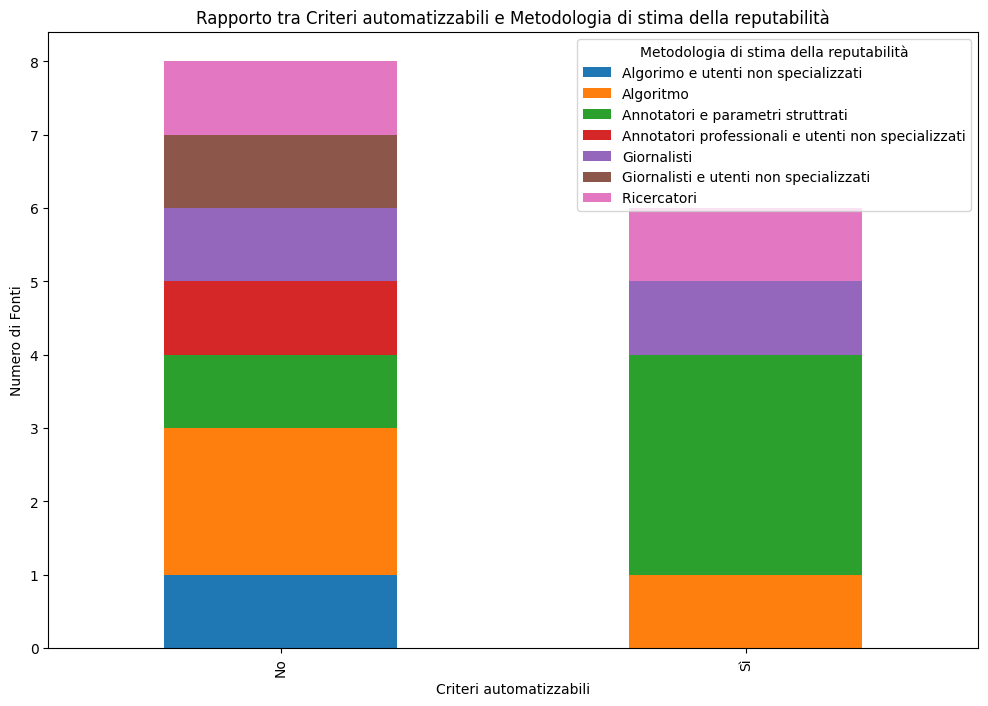

In [5]:

# Conteggio delle combinazioni di Criteri automatizzabili e Metodologia di stima della reputabilità
combinazioni = df.groupby(["Criteri automatizzabili", "Metodologia di stima della reputabilità"]).size().unstack()

# Creazione del grafico a barre impilato
combinazioni.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Criteri automatizzabili')
plt.ylabel('Numero di Fonti')
plt.title('Rapporto tra Criteri automatizzabili e Metodologia di stima della reputabilità')
plt.legend(title='Metodologia di stima della reputabilità')
plt.show()


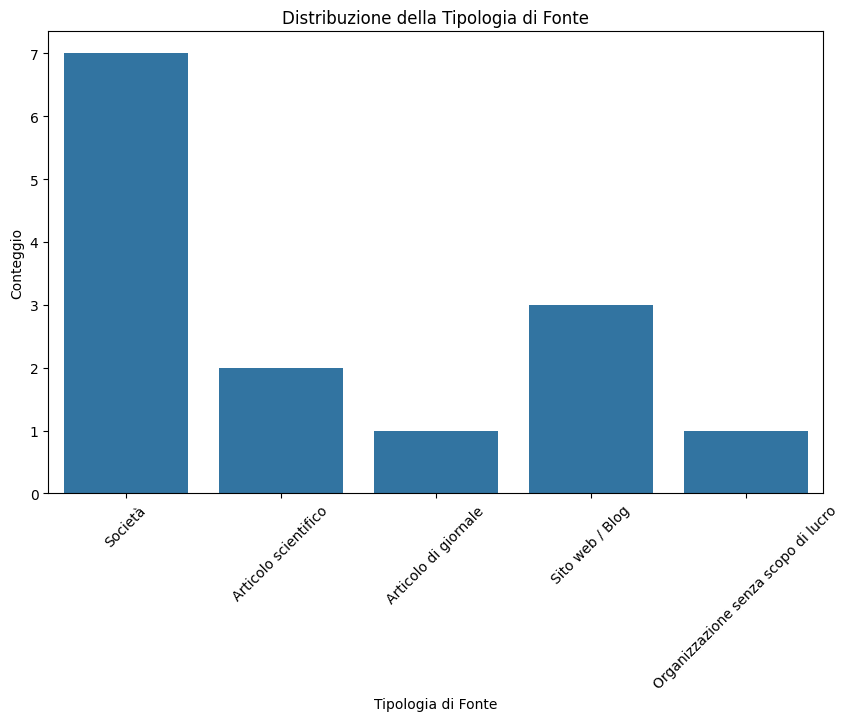

In [6]:
# Grafico a barre per la tipologia di fonte
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipologia', data=df)
plt.title('Distribuzione della Tipologia di Fonte')
plt.xlabel('Tipologia di Fonte')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()


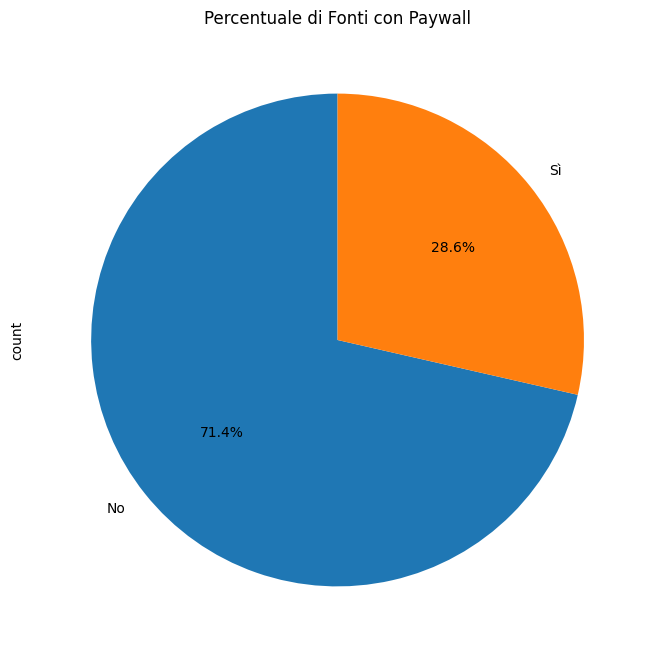

In [7]:
# Grafico a torta per il paywall
plt.figure(figsize=(8, 8))
df['Paywall'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentuale di Fonti con Paywall')
plt.show()


In [10]:
import pygraphviz as pgv


G = pgv.AGraph(directed=True)

# Aggiungere nodi con attributi
for index, row in df.iterrows():
    G.add_node(row['Nome'], label=row['Nome'], tipologia=row['Tipologia'], reputabilita=row['Scaladi output di reputabilità'])

# Aggiungere archi
for index, row in df.iterrows():
    if pd.notna(row['Tipologia']):
        G.add_edge(row['Tipologia'], row['Nome'])

# Specificare il layout (circo è un buon layout per alberi)
G.layout(prog='circo')

# Salvare il grafico in un file
G.draw('albero_dati.png')

print("Grafico salvato in 'albero_dati.png'")


Grafico salvato in 'albero_dati.png'
